In [1]:
# Importing Liabriries
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## Data Pre Processing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
df.shape

(32581, 12)

In [5]:
df.describe(include='all')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581,31686.000000,32581,32581,32581.000000,29465.000000,32581.000000,32581.000000,32581,32581.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,16446,NaN,6453,10777,NaN,NaN,NaN,NaN,26836,NaN
mean,27.734600,6.607485e+04,NaN,4.789686,NaN,NaN,9589.371106,11.011695,0.218164,0.170203,NaN,5.804211
std,6.348078,6.198312e+04,NaN,4.142630,NaN,NaN,6322.086646,3.240459,0.413006,0.106782,NaN,4.055001
min,20.000000,4.000000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,0.000000,NaN,2.000000
25%,23.000000,3.850000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.900000,0.000000,0.090000,NaN,3.000000
50%,26.000000,5.500000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.990000,0.000000,0.150000,NaN,4.000000
75%,30.000000,7.920000e+04,NaN,7.000000,NaN,NaN,12200.000000,13.470000,0.000000,0.230000,NaN,8.000000


#### Duplicated Values

In [6]:
df[df.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


In [7]:
df = df.drop_duplicates()

In [8]:
df.shape

(32416, 12)

In [9]:
### Drop 'loan_percent_income' column
df.drop(columns = ['loan_percent_income'],axis=1, inplace = True)

In [10]:
# For checking neumerical data type
num_col = [col for col in df if df[col].dtype != 'O']
num_col

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'cb_person_cred_hist_length']

In [11]:
# For checking Object data type
num_col = [col for col in df if df[col].dtype == 'O']
num_col

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

## Null Values Treatment

In [12]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [13]:
df.isnull().sum()/df.shape[0]*100

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.736303
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.547754
loan_status                   0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

In [14]:
# Replace Null Values with median

df['loan_int_rate'].fillna(df['loan_int_rate'].median(),inplace=True)
df['person_emp_length'].fillna(df['person_emp_length'].median(),inplace=True)

In [15]:
df.isnull().sum()/df.shape[0]*100

person_age                    0.0
person_income                 0.0
person_home_ownership         0.0
person_emp_length             0.0
loan_intent                   0.0
loan_grade                    0.0
loan_amnt                     0.0
loan_int_rate                 0.0
loan_status                   0.0
cb_person_default_on_file     0.0
cb_person_cred_hist_length    0.0
dtype: float64

## Outlier Treatment

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
aa = []
for col in df:
    print(col)
    aa.append(col)

person_age
person_income
person_home_ownership
person_emp_length
loan_intent
loan_grade
loan_amnt
loan_int_rate
loan_status
cb_person_default_on_file
cb_person_cred_hist_length


### person_age

<AxesSubplot:>

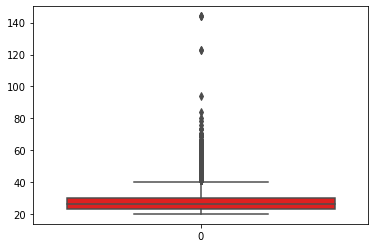

In [18]:
sns.boxplot(data = df['person_age'],color='Red')

In [19]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.person_age.quantile(0.75)-df.person_age.quantile(0.25)
print(IQR)

lower_bridge=df['person_age'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['person_age'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

7.0
12.5
40.5


(None, None)

In [20]:
Q1=df['person_age'].quantile(0.25)
Q3=df['person_age'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
lower_range=Q1-1.5*IQR
upper_range=Q3+1.5*IQR
print(lower_range,upper_range)

23.0
30.0
7.0
12.5 40.5


In [21]:
df[df['person_age']>upper_range]   # to check the outliers position index

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,10.99,0,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,N,15
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,N,26


In [22]:
df.shape

(32416, 11)

In [23]:
df[df['person_age']>60]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,10.99,0,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,N,25
...,...,...,...,...,...,...,...,...,...,...,...
32552,65,45900,RENT,2.0,EDUCATION,C,10000,10.99,0,Y,19
32557,69,24000,RENT,3.0,MEDICAL,A,6000,6.62,0,N,23
32562,61,160000,MORTGAGE,30.0,PERSONAL,B,24000,10.38,0,N,21
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,N,28


In [24]:
# Remove rows greater than age 70
df = df[df['person_age']<70]

In [25]:
df.shape

(32396, 11)

In [26]:
df['person_age'].describe()

count    32396.000000
mean        27.708606
std          6.127284
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max         69.000000
Name: person_age, dtype: float64

<AxesSubplot:xlabel='person_age', ylabel='Density'>

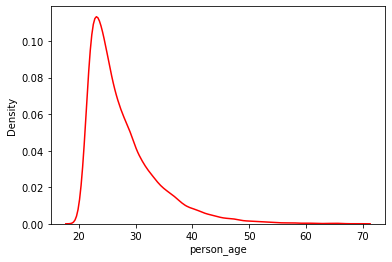

In [27]:
sns.kdeplot(data = df['person_age'],color='Red')

In [28]:
df['person_age'].skew() # Positive value means Right schewed and Vice-Versa
# skew valur nearer to zero means data normally distributed.

1.8115539246776773

In [29]:
df.shape

(32396, 11)

In [30]:
df[df['person_age']<lower_range]   # to check the outliers position index

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length


<AxesSubplot:title={'center':'person_age'}>

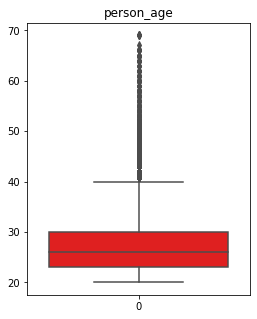

In [31]:
plt.figure(figsize=(4,5))
plt.title('person_age')
sns.boxplot(data = df['person_age'],color='Red')

### 'person_income'

<AxesSubplot:>

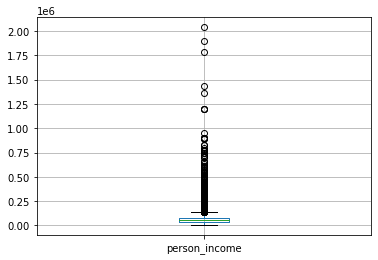

In [32]:
df.boxplot(column=['person_income'])

<AxesSubplot:title={'center':'person_income'}>

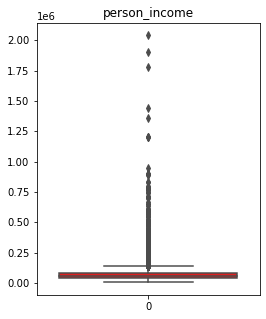

In [33]:
plt.figure(figsize=(4,5))
plt.title('person_income')
sns.boxplot(data = df['person_income'],color='Red')

<AxesSubplot:title={'center':'person_income'}, xlabel='person_income', ylabel='Density'>

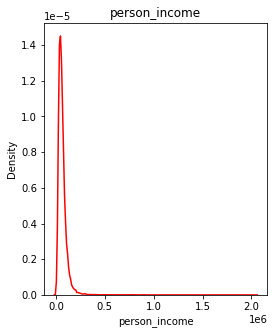

In [34]:
plt.figure(figsize=(4,5))
plt.title('person_income')
sns.kdeplot(data = df['person_income'],color='Red')

In [35]:
Q1=df['person_income'].quantile(0.25)
Q3=df['person_income'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
lower_range=Q1-1.5*IQR
upper_range=Q3+1.5*IQR
print(lower_range,upper_range)

38500.0
79200.0
40700.0
-22550.0 140250.0


In [36]:
# Checking records above upper range
df[df['person_income']>upper_range]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
15,23,500000,MORTGAGE,7.0,DEBTCONSOLIDATION,B,30000,10.65,0,N,3
20,25,162500,RENT,2.0,VENTURE,A,35000,7.49,0,N,4
33,25,306000,RENT,2.0,DEBTCONSOLIDATION,C,24250,13.85,0,N,3
34,26,300000,MORTGAGE,10.0,MEDICAL,C,7800,13.49,0,N,4
42,26,300000,MORTGAGE,10.0,VENTURE,A,20000,7.88,0,N,4
...,...,...,...,...,...,...,...,...,...,...,...
32544,58,780000,MORTGAGE,7.0,PERSONAL,A,4500,6.91,0,N,20
32546,60,1900000,MORTGAGE,5.0,PERSONAL,A,1500,10.99,0,N,21
32551,58,780000,MORTGAGE,7.0,PERSONAL,A,4500,6.91,0,N,19
32562,61,160000,MORTGAGE,30.0,PERSONAL,B,24000,10.38,0,N,21


In [37]:
df['person_income'].describe()

count    3.239600e+04
mean     6.590291e+04
std      5.252917e+04
min      4.000000e+03
25%      3.850000e+04
50%      5.500000e+04
75%      7.920000e+04
max      2.039784e+06
Name: person_income, dtype: float64

In [38]:
# records above upper limmit replacing with upper limit (Capping)

#df['person_income'] = np.where(df['person_income'] > upper_range, upper_range)

In [39]:
import numpy as np

df['person_income'] = np.where(df['person_income'] > upper_range, upper_range, df['person_income'])


<AxesSubplot:title={'center':'person_income'}, xlabel='person_income', ylabel='Density'>

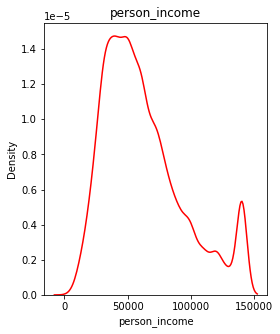

In [40]:
plt.figure(figsize=(4,5))
plt.title('person_income')
sns.kdeplot(data = df['person_income'],color='Red')

<AxesSubplot:>

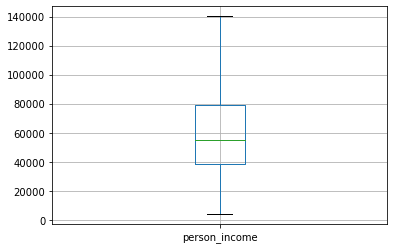

In [41]:
df.boxplot(column=['person_income'])

### 'person_emp_length'

<AxesSubplot:title={'center':'person_emp_length'}>

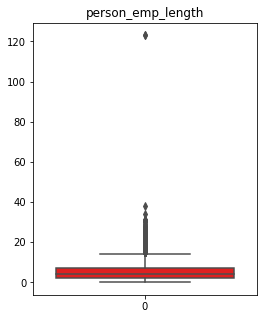

In [42]:
plt.figure(figsize=(4,5))
plt.title('person_emp_length')
sns.boxplot(data = df['person_emp_length'],color='Red')

In [43]:
Q1=df['person_emp_length'].quantile(0.25)
Q3=df['person_emp_length'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
lower_range=Q1-1.5*IQR
upper_range=Q3+1.5*IQR
print(lower_range,upper_range)

2.0
7.0
5.0
-5.5 14.5


In [44]:
df[df['person_emp_length']>upper_range]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000.0,RENT,123.0,PERSONAL,D,35000,16.02,1,Y,3
210,21,140250.0,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,N,4
17834,34,140250.0,MORTGAGE,18.0,PERSONAL,B,2000,9.99,0,N,7
17847,35,140250.0,MORTGAGE,17.0,DEBTCONSOLIDATION,C,20000,13.85,0,Y,7
17850,34,120000.0,RENT,17.0,VENTURE,B,35000,10.59,0,N,6
...,...,...,...,...,...,...,...,...,...,...,...
32515,53,106000.0,MORTGAGE,38.0,PERSONAL,B,20000,9.88,0,N,23
32516,52,29000.0,OWN,23.0,PERSONAL,A,7000,7.49,0,N,20
32519,51,115900.0,MORTGAGE,16.0,PERSONAL,A,12000,7.88,0,N,29
32539,61,140250.0,MORTGAGE,30.0,DEBTCONSOLIDATION,B,24000,10.38,1,N,20


In [45]:
df[df['person_emp_length']>upper_range]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000.0,RENT,123.0,PERSONAL,D,35000,16.02,1,Y,3
210,21,140250.0,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,N,4
17834,34,140250.0,MORTGAGE,18.0,PERSONAL,B,2000,9.99,0,N,7
17847,35,140250.0,MORTGAGE,17.0,DEBTCONSOLIDATION,C,20000,13.85,0,Y,7
17850,34,120000.0,RENT,17.0,VENTURE,B,35000,10.59,0,N,6
...,...,...,...,...,...,...,...,...,...,...,...
32515,53,106000.0,MORTGAGE,38.0,PERSONAL,B,20000,9.88,0,N,23
32516,52,29000.0,OWN,23.0,PERSONAL,A,7000,7.49,0,N,20
32519,51,115900.0,MORTGAGE,16.0,PERSONAL,A,12000,7.88,0,N,29
32539,61,140250.0,MORTGAGE,30.0,DEBTCONSOLIDATION,B,24000,10.38,1,N,20


<AxesSubplot:>

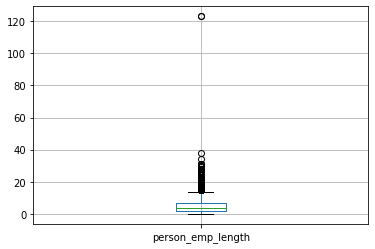

In [46]:
df.boxplot(column=['person_emp_length'])

<AxesSubplot:title={'center':'person_emp_length'}, xlabel='person_emp_length', ylabel='Density'>

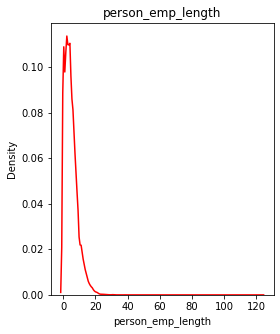

In [47]:
plt.figure(figsize=(4,5))
plt.title('person_emp_length')
sns.kdeplot(data = df['person_emp_length'],color='Red')

In [48]:
df['person_emp_length'].describe()

count    32396.000000
mean         4.768150
std          4.084543
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        123.000000
Name: person_emp_length, dtype: float64

In [49]:
# Check 'person_emp_length' above 70
df[df['person_emp_length']>70]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000.0,RENT,123.0,PERSONAL,D,35000,16.02,1,Y,3
210,21,140250.0,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,N,4


In [50]:
# Drop 'person_emp_length' above 70
df = df[df['person_emp_length']<70]

In [51]:
df.shape

(32394, 11)

<AxesSubplot:title={'center':'person_emp_length'}, xlabel='person_emp_length', ylabel='Density'>

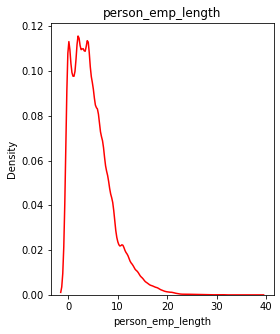

In [52]:
plt.figure(figsize=(4,5))
plt.title('person_emp_length')
sns.kdeplot(data = df['person_emp_length'],color='Red')

<AxesSubplot:>

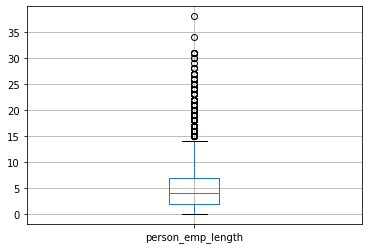

In [53]:
df.boxplot(column=['person_emp_length'])

In [54]:
# Replace records above Uppar Range with Upper Range
df['person_emp_length'] = np.where(df['person_emp_length'] > upper_range, upper_range, df['person_emp_length'])

<AxesSubplot:title={'center':'person_emp_length'}, xlabel='person_emp_length', ylabel='Density'>

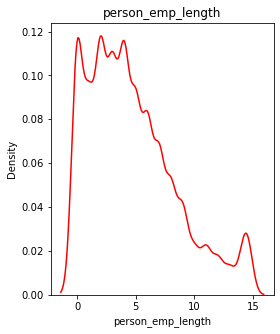

In [55]:
plt.figure(figsize=(4,5))
plt.title('person_emp_length')
sns.kdeplot(data = df['person_emp_length'],color='Red')

<AxesSubplot:>

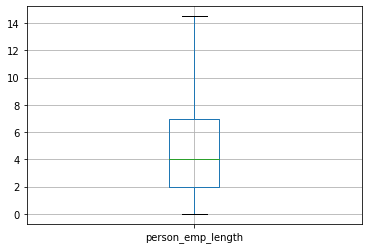

In [56]:
df.boxplot(column=['person_emp_length'])

### 'loan_amnt'

<AxesSubplot:>

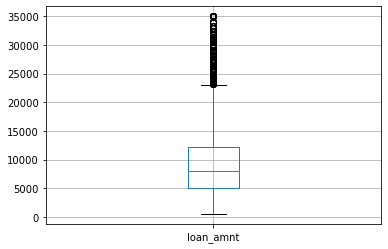

In [57]:
# """plt.figure(figsize=(4,5))
# plt.title('loan_amnt')
# sns.boxplot(data = df['loan_amnt'],color='Red')"""

df.boxplot(column=['loan_amnt'])

<AxesSubplot:title={'center':'loan_amnt'}, xlabel='loan_amnt', ylabel='Density'>

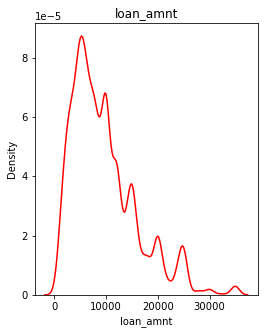

In [58]:
plt.figure(figsize=(4,5))
plt.title('loan_amnt')
sns.kdeplot(data = df['loan_amnt'],color='Red')

In [59]:
df['loan_amnt'].describe()

count    32394.000000
mean      9593.548188
std       6321.459587
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12250.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [60]:
Q1=df['loan_amnt'].quantile(0.25)
Q3=df['loan_amnt'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
lower_range=Q1-1.5*IQR
upper_range=Q3+1.5*IQR
print(lower_range,upper_range)

5000.0
12250.0
7250.0
-5875.0 23125.0


In [61]:
df[df['loan_amnt']>upper_range]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
3,23,65500.0,RENT,4.0,MEDICAL,C,35000,15.23,1,N,2
4,24,54400.0,RENT,8.0,MEDICAL,C,35000,14.27,1,Y,4
6,26,77100.0,RENT,8.0,EDUCATION,B,35000,12.42,1,N,3
7,24,78956.0,RENT,5.0,MEDICAL,B,35000,11.11,1,N,4
8,24,83000.0,RENT,8.0,PERSONAL,A,35000,8.90,1,N,2
...,...,...,...,...,...,...,...,...,...,...,...
32524,51,120000.0,MORTGAGE,2.0,PERSONAL,A,30000,7.90,0,N,22
32539,61,140250.0,MORTGAGE,14.5,DEBTCONSOLIDATION,B,24000,10.38,1,N,20
32541,52,140250.0,MORTGAGE,9.0,PERSONAL,D,25000,14.11,1,N,30
32562,61,140250.0,MORTGAGE,14.5,PERSONAL,B,24000,10.38,0,N,21


In [62]:
# Replace records above Uppar Range with Upper Range
df['loan_amnt'] = np.where(df['loan_amnt'] > upper_range, upper_range, df['loan_amnt'])

<AxesSubplot:title={'center':'loan_amnt'}, xlabel='loan_amnt', ylabel='Density'>

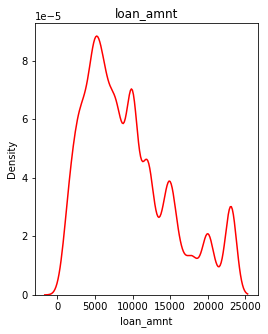

In [63]:
plt.figure(figsize=(4,5))
plt.title('loan_amnt')
sns.kdeplot(data = df['loan_amnt'],color='Red')

<AxesSubplot:>

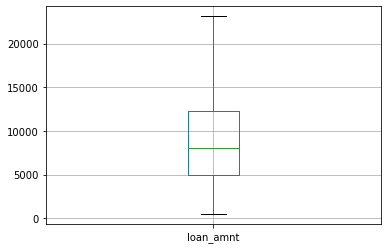

In [64]:
df.boxplot(column=['loan_amnt'])

In [65]:
df['loan_amnt'].describe()

count    32394.000000
mean      9418.383034
std       5827.974281
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12250.000000
max      23125.000000
Name: loan_amnt, dtype: float64

### 'loan_int_rate'

<AxesSubplot:>

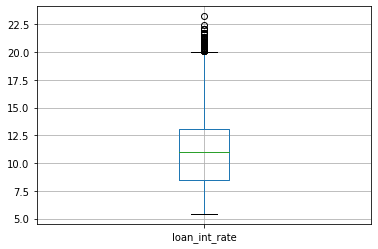

In [66]:
df.boxplot(column = ['loan_int_rate'])

<AxesSubplot:xlabel='loan_int_rate', ylabel='Density'>

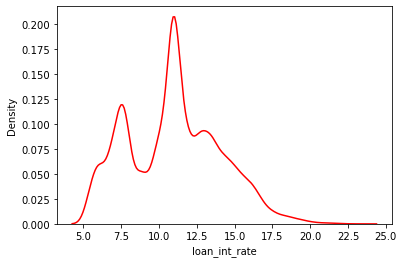

In [67]:
sns.kdeplot(data = df['loan_int_rate'],color='Red')

In [68]:
Q1=df['loan_int_rate'].quantile(0.25)
Q3=df['loan_int_rate'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
lower_range=Q1-1.5*IQR
upper_range=Q3+1.5*IQR
print(lower_range,upper_range)

8.49
13.11
4.619999999999999
1.5600000000000014 20.04


In [69]:
df[df['loan_int_rate']>upper_range]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
17,23,92111.0,RENT,7.0,MEDICAL,F,23125.0,20.25,1,N,4
451,26,108000.0,RENT,9.0,EDUCATION,G,23125.0,20.16,1,N,3
523,23,56000.0,RENT,8.0,MEDICAL,G,21600.0,21.21,1,Y,4
1189,24,54000.0,RENT,0.0,PERSONAL,G,16750.0,20.11,1,Y,2
1827,24,30000.0,RENT,5.0,MEDICAL,G,2000.0,21.27,1,Y,3
...,...,...,...,...,...,...,...,...,...,...,...
29305,50,44000.0,RENT,14.0,MEDICAL,G,20000.0,20.40,1,N,11
29495,42,20400.0,RENT,4.0,PERSONAL,F,2000.0,20.99,0,Y,13
31452,37,71400.0,MORTGAGE,7.0,MEDICAL,E,3100.0,20.69,1,Y,14
31853,42,140250.0,MORTGAGE,7.0,EDUCATION,G,23125.0,20.53,1,N,14


In [70]:
# Replace records above Uppar Range with Upper Range
df['loan_int_rate'] = np.where(df['loan_int_rate'] > upper_range, upper_range, df['loan_int_rate'])

<AxesSubplot:xlabel='loan_int_rate', ylabel='Density'>

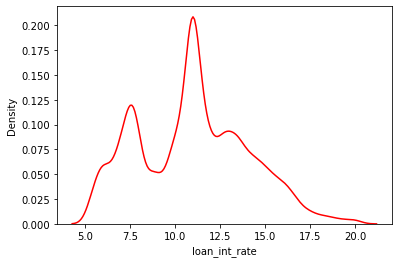

In [71]:
sns.kdeplot(data = df['loan_int_rate'],color='Red')

## Encoding

In [72]:
# importing Encoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32394 entries, 1 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32394 non-null  int64  
 1   person_income               32394 non-null  float64
 2   person_home_ownership       32394 non-null  object 
 3   person_emp_length           32394 non-null  float64
 4   loan_intent                 32394 non-null  object 
 5   loan_grade                  32394 non-null  object 
 6   loan_amnt                   32394 non-null  float64
 7   loan_int_rate               32394 non-null  float64
 8   loan_status                 32394 non-null  int64  
 9   cb_person_default_on_file   32394 non-null  object 
 10  cb_person_cred_hist_length  32394 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 3.0+ MB


In [74]:
df['person_home_ownership'].value_counts()

RENT        16363
MORTGAGE    13362
OWN          2563
OTHER         106
Name: person_home_ownership, dtype: int64

In [75]:
# Encode 'person_home_ownership' Column with Map methods
df['person_home_ownership'] = df['person_home_ownership'].map({'RENT':1,'MORTGAGE':2,'OWN':3,'OTHER':4})

In [76]:
df['person_home_ownership'].value_counts()

1    16363
2    13362
3     2563
4      106
Name: person_home_ownership, dtype: int64

In [77]:
df['loan_intent'].value_counts()

EDUCATION            6409
MEDICAL              6032
VENTURE              5679
PERSONAL             5492
DEBTCONSOLIDATION    5188
HOMEIMPROVEMENT      3594
Name: loan_intent, dtype: int64

In [78]:
# Encode 'person_home_ownership' Column with Map methods
df['loan_intent'] = df['loan_intent'].map({'EDUCATION':1,'MEDICAL':2,'VENTURE':3,'PERSONAL':4,'DEBTCONSOLIDATION':5,'HOMEIMPROVEMENT':6})

In [79]:
df['loan_intent'].value_counts()

1    6409
2    6032
3    5679
4    5492
5    5188
6    3594
Name: loan_intent, dtype: int64

In [80]:
df['loan_grade'].value_counts()

A    10695
B    10380
C     6433
D     3618
E      963
F      241
G       64
Name: loan_grade, dtype: int64

In [81]:
df['cb_person_default_on_file'].value_counts()

N    26667
Y     5727
Name: cb_person_default_on_file, dtype: int64

In [82]:
df['cb_person_default_on_file']=df['cb_person_default_on_file'].map({'N':0,'Y':1})

In [83]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600.0,3,5.0,1,B,1000.0,11.14,0,0,2
2,25,9600.0,2,1.0,2,C,5500.0,12.87,1,0,3
3,23,65500.0,1,4.0,2,C,23125.0,15.23,1,0,2
4,24,54400.0,1,8.0,2,C,23125.0,14.27,1,1,4
5,21,9900.0,3,2.0,3,A,2500.0,7.14,1,0,2


In [84]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600.0,3,5.0,1,B,1000.0,11.14,0,0,2
2,25,9600.0,2,1.0,2,C,5500.0,12.87,1,0,3
3,23,65500.0,1,4.0,2,C,23125.0,15.23,1,0,2
4,24,54400.0,1,8.0,2,C,23125.0,14.27,1,1,4
5,21,9900.0,3,2.0,3,A,2500.0,7.14,1,0,2


In [85]:
df['loan_grade'].value_counts()

A    10695
B    10380
C     6433
D     3618
E      963
F      241
G       64
Name: loan_grade, dtype: int64

In [86]:
# Encode 'person_home_ownership' Column with Map methods
df['loan_grade'] = df['loan_grade'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})

In [87]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600.0,3,5.0,1,2,1000.0,11.14,0,0,2
2,25,9600.0,2,1.0,2,3,5500.0,12.87,1,0,3
3,23,65500.0,1,4.0,2,3,23125.0,15.23,1,0,2
4,24,54400.0,1,8.0,2,3,23125.0,14.27,1,1,4
5,21,9900.0,3,2.0,3,1,2500.0,7.14,1,0,2


## EDA

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32394 entries, 1 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32394 non-null  int64  
 1   person_income               32394 non-null  float64
 2   person_home_ownership       32394 non-null  int64  
 3   person_emp_length           32394 non-null  float64
 4   loan_intent                 32394 non-null  int64  
 5   loan_grade                  32394 non-null  int64  
 6   loan_amnt                   32394 non-null  float64
 7   loan_int_rate               32394 non-null  float64
 8   loan_status                 32394 non-null  int64  
 9   cb_person_default_on_file   32394 non-null  int64  
 10  cb_person_cred_hist_length  32394 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.0 MB


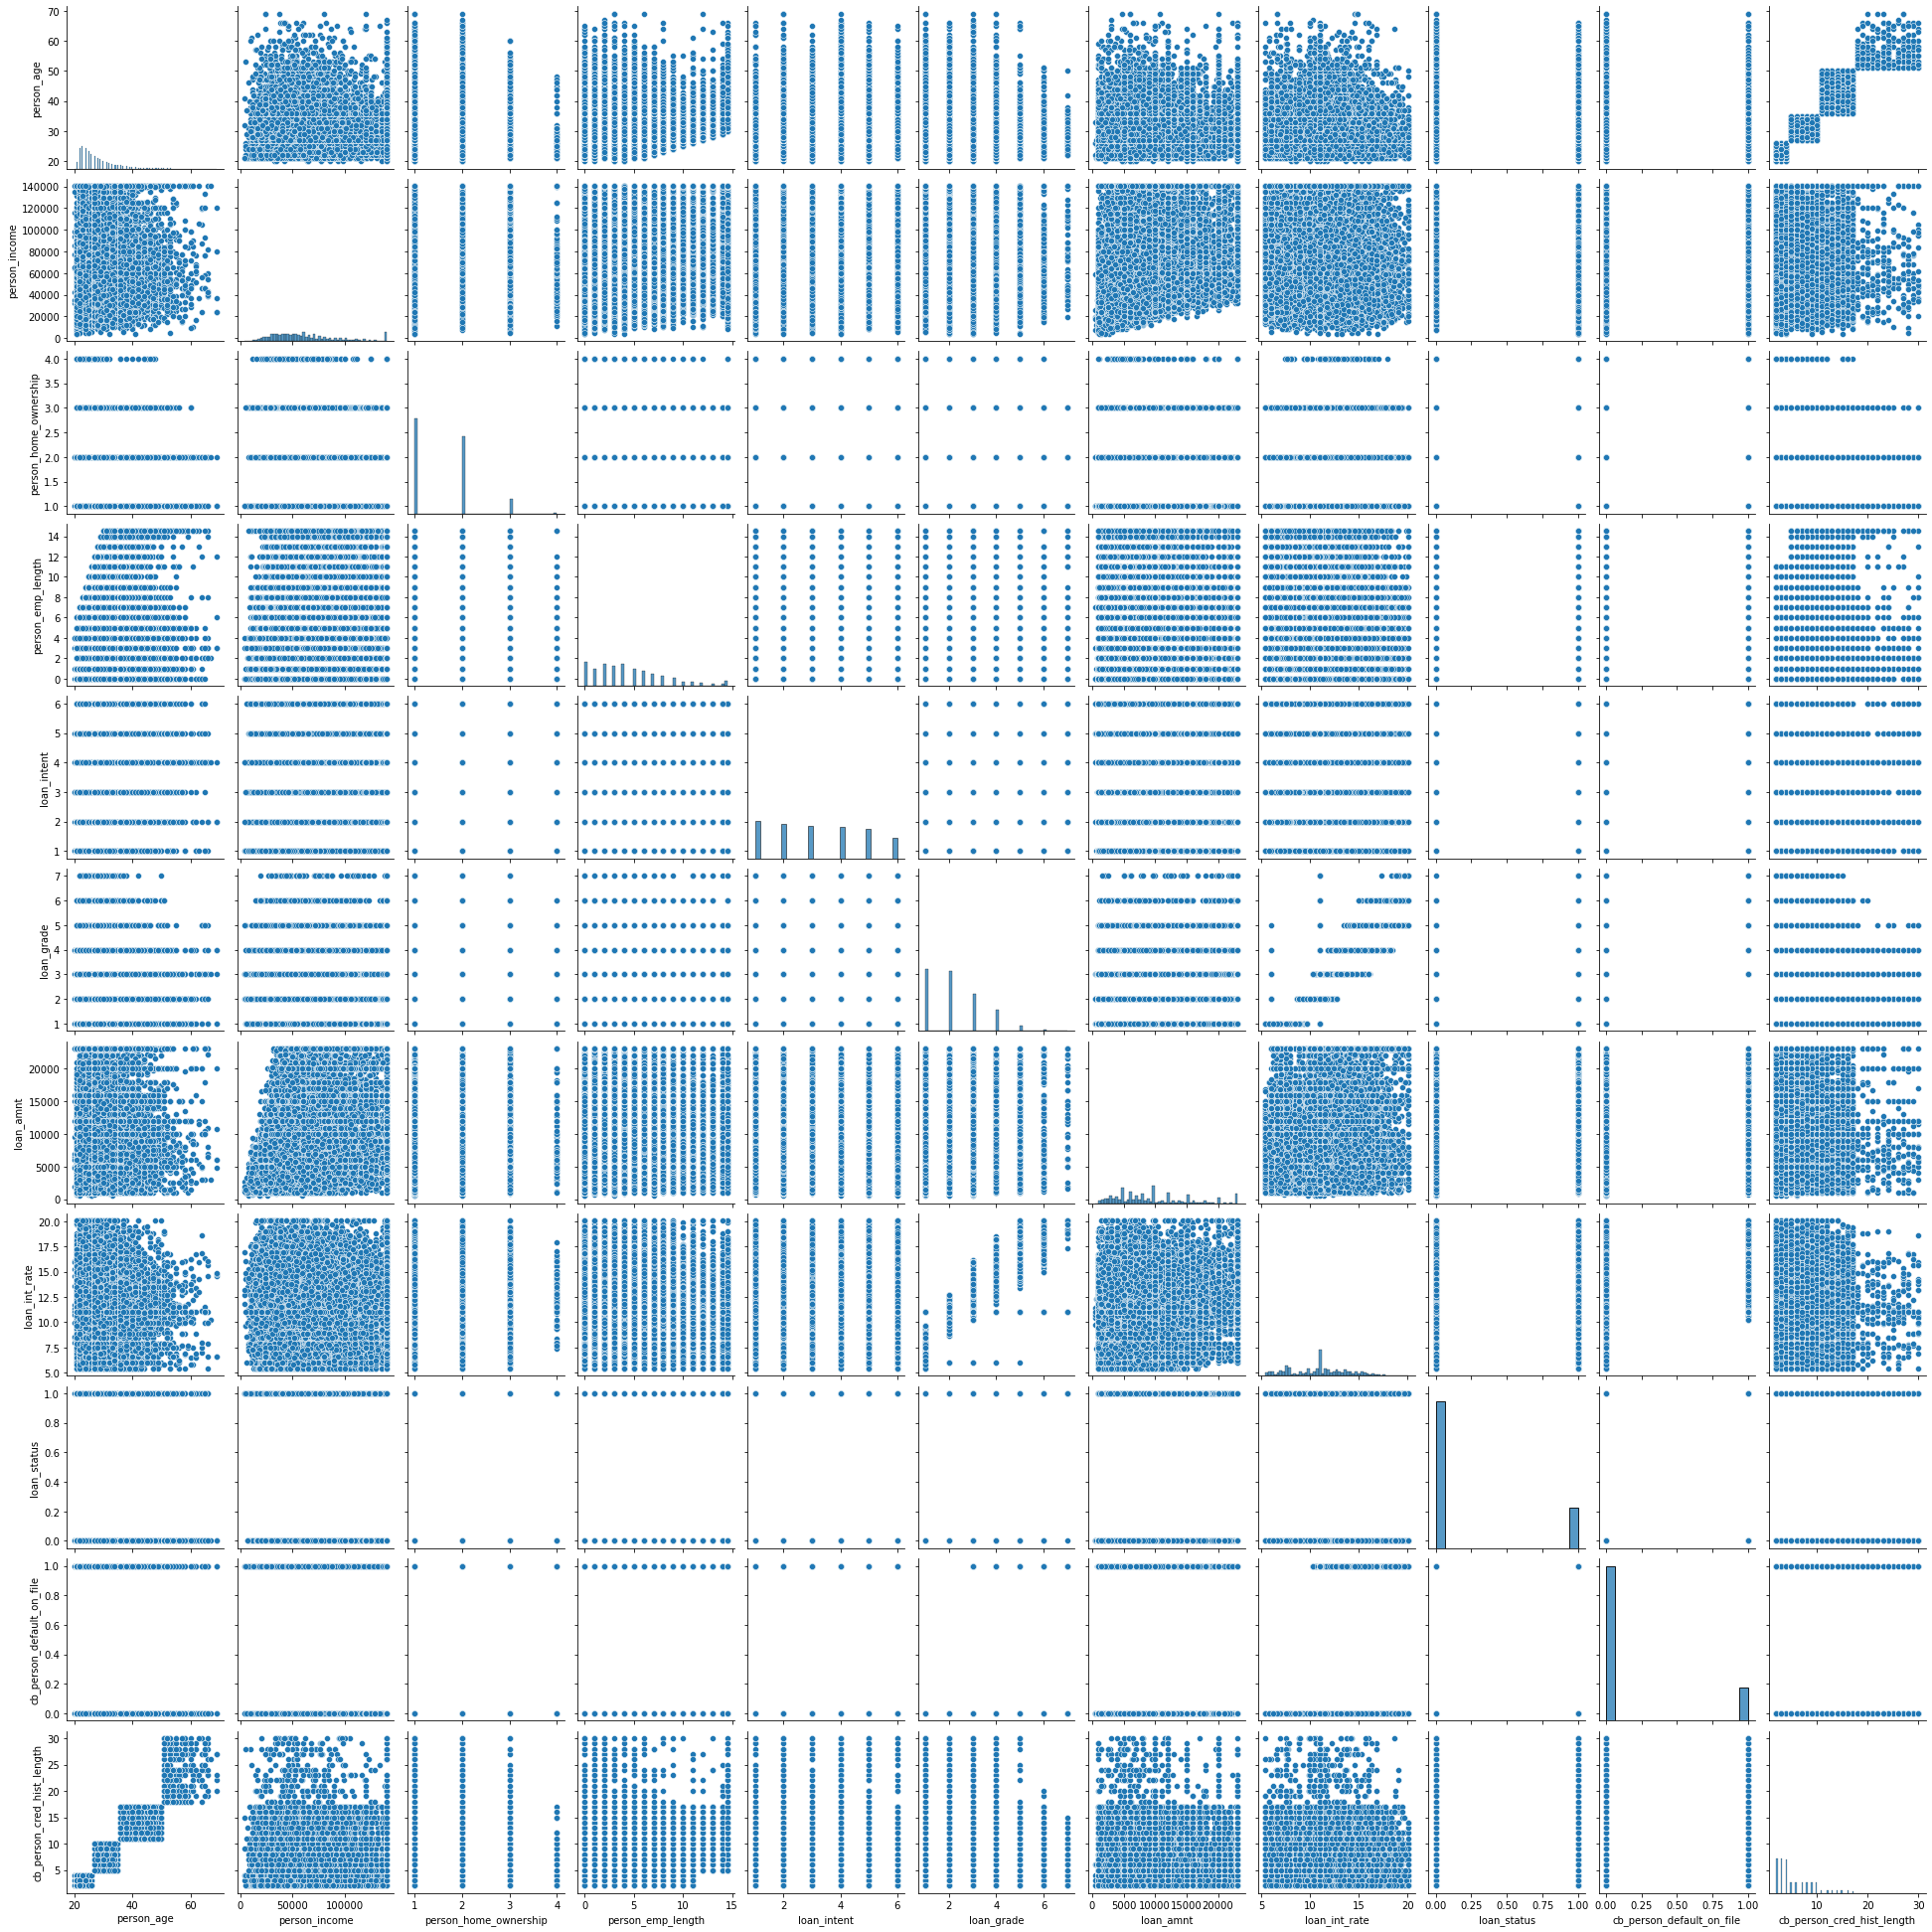

In [89]:
sns.pairplot(df)

In [90]:
df.corr()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
person_age,1.000000,0.118356,0.024594,0.143389,0.089533,0.014172,0.052104,0.011064,-0.021229,0.007206,0.878419
person_income,0.118356,1.000000,0.190799,0.205526,0.068394,-0.017420,0.414751,-0.017253,-0.246089,-0.014892,0.094403
person_home_ownership,0.024594,0.190799,1.000000,0.190439,0.011798,-0.096468,0.079162,-0.103628,-0.223594,-0.045842,0.022144
person_emp_length,0.143389,0.205526,0.190439,1.000000,0.037108,-0.050094,0.113569,-0.055941,-0.090191,-0.030756,0.122773
loan_intent,0.089533,0.068394,0.011798,0.037108,1.000000,0.019261,0.035631,0.012192,0.061159,0.013473,0.072266
loan_grade,0.014172,-0.017420,-0.096468,-0.050094,0.019261,1.000000,0.144749,0.889594,0.373416,0.536679,0.014870
loan_amnt,0.052104,0.414751,0.079162,0.113569,0.035631,0.144749,1.000000,0.136424,0.104930,0.038098,0.041146
loan_int_rate,0.011064,-0.017253,-0.103628,-0.055941,0.012192,0.889594,0.136424,1.000000,0.319800,0.477115,0.015393
loan_status,-0.021229,-0.246089,-0.223594,-0.090191,0.061159,0.373416,0.104930,0.319800,1.000000,0.179153,-0.016025
cb_person_default_on_file,0.007206,-0.014892,-0.045842,-0.030756,0.013473,0.536679,0.038098,0.477115,0.179153,1.000000,0.004669


## Train TEst SPlit

In [91]:
X = df.drop('loan_status',axis=1)
y = df['loan_status']

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [94]:
X_train.shape

(25915, 10)

In [95]:
X_test.shape

(6479, 10)

### Feature Scalling

In [96]:
#importing lib
from sklearn.preprocessing import StandardScaler

In [97]:
sc = StandardScaler()

In [98]:
sc.fit(X_train)

StandardScaler()

In [99]:
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [100]:
X_train

array([[-0.60762445, -0.48275883, -0.89191178, ..., -1.42994034,
        -0.46449265, -0.69410387],
       [ 0.53181665,  2.4507933 , -0.89191178, ...,  0.08566868,
        -0.46449265,  0.29035037],
       [ 0.53181665,  0.63894342,  3.72901859, ...,  0.34911145,
         2.15288658,  0.78257749],
       ...,
       [-1.09595635, -1.23777493,  0.64839835, ...,  0.75891131,
        -0.46449265, -0.69410387],
       [-0.60762445,  0.5302211 , -0.89191178, ...,  0.53774948,
         2.15288658, -0.94021743],
       [ 0.85737125, -0.90732955, -0.89191178, ..., -0.00865034,
        -0.46449265,  0.53646393]])

In [101]:
sc.mean_

array([2.77328574e+01, 6.23456490e+04, 1.57904688e+00, 4.66324522e+00,
       3.24136600e+00, 2.22149334e+00, 9.41232394e+03, 1.10165970e+01,
       1.77464789e-01, 5.82025854e+00])

In [102]:
sc.scale_

array([6.14336274e+00, 3.17874017e+04, 6.49219911e-01, 3.72621865e+00,
       1.65156227e+00, 1.16589632e+00, 5.82668234e+03, 3.07467161e+00,
       3.82061562e-01, 4.06316500e+00])

## Training ML Model

### 1. Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
lr = LogisticRegression()

In [105]:
lr.fit(X_train,y_train)

LogisticRegression()

In [134]:
lr.score(X_test, y_test)

0.844574780058651

In [106]:
y_pred = lr.predict(X_test)

In [107]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

### Model Evaluation

In [108]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [109]:
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)

In [110]:
print (f"MSE: {MSE}")
print (f"RMSE: {RMSE}")
print (f"MAE: {MAE}")
print (f"R2: {R2}")

MSE: 0.15542521994134897
RMSE: 0.39424005369996207
MAE: 0.15542521994134897
R2: 0.06736200949455273


In [111]:
# Making Model Evaluation Function for further models
def get_metrics (y_test,y_pred,model_name):
    MSE = mean_squared_error(y_test,y_pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_test,y_pred)
    R2 = r2_score(y_test,y_pred)

    print(f"{model_name}:['MSE':{round(MSE,3)},'RMSE':{round(RMSE,3)},'MAE':{round(MAE,3)},'R2':{round(R2,3)}]")

### Random Forest

In [114]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [113]:
# rfr = RandomForestClassifier().fit(X_train, y_train)
# y_pred_rfr = rfr.predict(X_test)

# get_metrics(y_test,y_pred_rfr,"Random Forest")

Random Forest:['MSE':0.069,'RMSE':0.263,'MAE':0.069,'R2':0.584]


In [115]:
model = RandomForestClassifier(n_estimators=30)

In [116]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30)

In [117]:
model.score(X_test, y_test)

0.9285383546843649

In [125]:
model1 = RandomForestClassifier(n_estimators=30, max_features=3)

In [126]:
model1.fit(X_train, y_train)

RandomForestClassifier(max_features=3, n_estimators=30)

In [128]:
model1.score(X_test, y_test)

0.9316252508103102

In [124]:
model2 = RandomForestClassifier(n_estimators=20, max_features=1)

In [122]:
model2.fit(X_train, y_train)

RandomForestClassifier(max_features=1, n_estimators=20)

In [123]:
model2.score(X_test, y_test)

0.9030714616453156

## Adaboost Classifier

In [139]:
from sklearn.ensemble import AdaBoostClassifier

In [140]:
adaboost = AdaBoostClassifier()

In [141]:
adaboost.fit(X_train, y_train)

AdaBoostClassifier()

In [142]:
adaboost.score(X_test, y_test)

0.8567680197561353

In [157]:
adaboost1 = AdaBoostClassifier(n_estimators=80, learning_rate=0.5)

In [158]:
adaboost1.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=80)

In [159]:
adaboost1.score(X_test, y_test)

0.8567680197561353

## Save ML Model

In [129]:
import pickle
import os

dir = r"E:\My Project\Credit Risk Analysis\Model"

model_file_name = "random_forest_classifier_score_0_931_v1.pkl"

model_file_path = os.path.join(dir, model_file_name)

pickle.dump(model1, open(model_file_path, "wb"))

In [130]:
X_test[0,:]

array([-0.93317905,  0.02058523, -0.89191178,  0.0903744 , -1.35711867,
       -1.04768608, -0.03214933, -1.63484027, -0.46449265, -0.44799031])

In [131]:
X_test[1,:]

array([-1.09595635, -0.04233278, -0.89191178, -0.44636276, -1.35711867,
       -0.18997688, -0.32820117, -0.20379313, -0.46449265, -0.94021743])

## Dump Scalling Parameter

In [132]:
sc_dump_path = r"E:\My Project\Credit Risk Analysis\Model\sc.pkl"

pickle.dump(sc, open(sc_dump_path, "wb"))

## Deployment

In [133]:
df.head(1)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600.0,3,5.0,1,2,1000.0,11.14,0,0,2


### User Input Data

In [163]:
person_age = 33
person_income = 850000
person_home_ownership = 'OWN'
person_emp_length = 5
loan_intent = 'PERSONAL'
loan_grade = 'A'
loan_amnt = 250000
loan_int_rate = 11.50
cb_person_default_on_file = 'N'
cb_person_cred_hist_length = 4

In [135]:
# Making Dictionary Format For Categorical features

person_home_ownership = {'RENT':1,'MORTGAGE':2,'OWN':3,'OTHER':4}

loan_intent = {'EDUCATION':1,'MEDICAL':2,'VENTURE':3,'PERSONAL':4,'DEBTCONSOLIDATION':5,'HOMEIMPROVEMENT':6}

cb_person_default_on_file = {'N':0,'Y':1}

loan_grade= {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})

1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
         ..
32576   NaN
32577   NaN
32578   NaN
32579   NaN
32580   NaN
Name: loan_grade, Length: 32394, dtype: float64

### Convert User Input to Model Consumable Format

In [164]:
# Making Dictionary Format For Categorical features

person_home_ownership_dic = {'RENT':1,'MORTGAGE':2,'OWN':3,'OTHER':4}

loan_intent_dic = {'EDUCATION':1,'MEDICAL':2,'VENTURE':3,'PERSONAL':4,'DEBTCONSOLIDATION':5,'HOMEIMPROVEMENT':6}

cb_person_default_on_file_dic = {'N':0,'Y':1}

loan_grade_dic = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7}

In [137]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

In [165]:
input_for_pred = [person_age, person_income, person_home_ownership_dic[person_home_ownership],
       person_emp_length, loan_intent_dic[loan_intent], loan_grade_dic[loan_grade], loan_amnt,
       loan_int_rate, cb_person_default_on_file_dic[cb_person_default_on_file],
       cb_person_cred_hist_length]

input_for_pred

[33, 850000, 3, 5, 4, 1, 250000, 11.5, 0, 4]

In [178]:
df_column = ['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'cb_person_default_on_file',
       'cb_person_cred_hist_length']

df_inputs = pd.DataFrame([input_for_pred], columns = df_column)
df_inputs

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length
0,33,850000,3,5,4,1,250000,11.5,0,4


In [168]:
# Scale User Input Data

scaled_input = sc.transform([input_for_pred])
scaled_input

C:\Users\as\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.85737125, 24.77882143,  2.18870847,  0.0903744 ,  0.45934326,
        -1.04768608, 41.29068003,  0.15722103, -0.46449265, -0.44799031]])

In [171]:
x=model1.predict(scaled_input)
x

array([0], dtype=int64)

In [172]:
# Another Input
person_age = 53
person_income = 50000
person_home_ownership = 'RENT'
person_emp_length = 2
loan_intent = 'VENTURE'
loan_grade = 'F'
loan_amnt = 250000
loan_int_rate = 11.50
cb_person_default_on_file = 'Y'
cb_person_cred_hist_length = 1

In [173]:
input_for_pred_2 = [person_age, person_income, person_home_ownership_dic[person_home_ownership],
       person_emp_length, loan_intent_dic[loan_intent], loan_grade_dic[loan_grade], loan_amnt,
       loan_int_rate, cb_person_default_on_file_dic[cb_person_default_on_file],
       cb_person_cred_hist_length]

input_for_pred_2

[53, 50000, 1, 2, 3, 6, 250000, 11.5, 1, 1]

In [175]:
# Scale User Input Data 2

scaled_input_2 = sc.transform([input_for_pred_2])
scaled_input_2

C:\Users\as\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 4.11291725, -0.38838182, -0.89191178, -0.71473133, -0.14614405,
         3.24085992, 41.29068003,  0.15722103,  2.15288658, -1.18633098]])

In [176]:
x1 =model1.predict(scaled_input_2)
x1

array([1], dtype=int64)